# Segmentation 3 - Morphology

#### Adjusting and cleaning our ROIs.

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

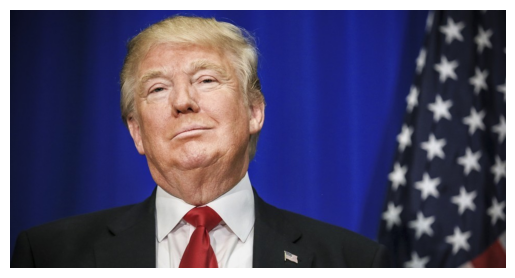

In [335]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

I = cv2.imread("Trump.jpg")

I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
Original = I.copy()

plt.imshow(I)
plt.axis('off')

7 21


(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

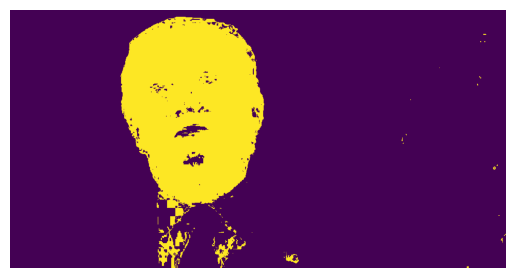

In [336]:
I = cv2.cvtColor(I, cv2.COLOR_RGB2HSV)

H = I[:,:,0]

H2 = H.copy()

low = 7
high = 21

H2[H >= low] = 255
H2[H > high] = 0
H2[H < low] = 0

print(low, high)

plt.imshow(H2)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

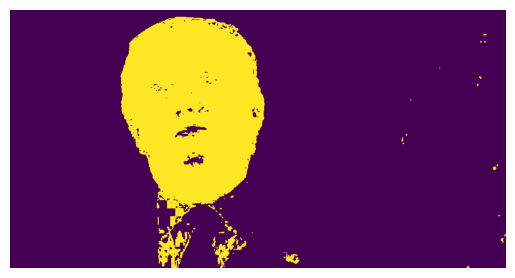

In [337]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))

NewMask = cv2.dilate(H2 ,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

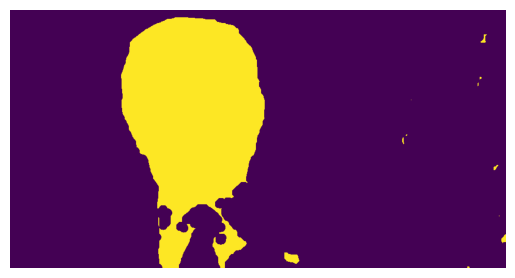

In [338]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))

NewMask = cv2.morphologyEx(NewMask,cv2.MORPH_CLOSE,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

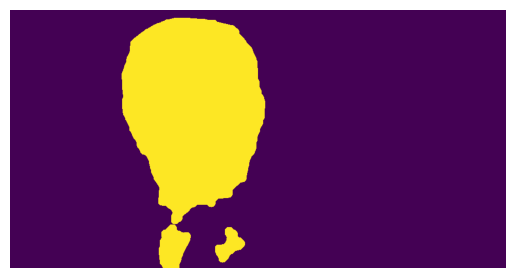

In [339]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))

NewMask = cv2.morphologyEx(NewMask,cv2.MORPH_OPEN,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

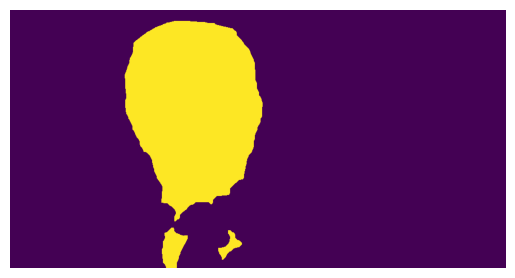

In [340]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))

NewMask = cv2.erode(NewMask ,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

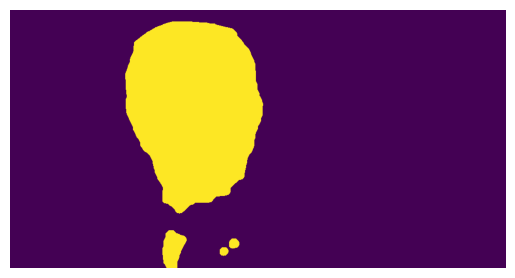

In [341]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))

NewMask = cv2.morphologyEx(NewMask,cv2.MORPH_OPEN,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

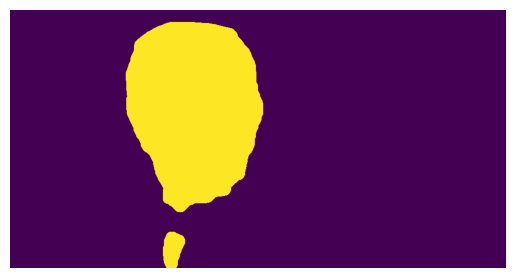

In [342]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(24,24))

NewMask = cv2.morphologyEx(NewMask,cv2.MORPH_OPEN,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

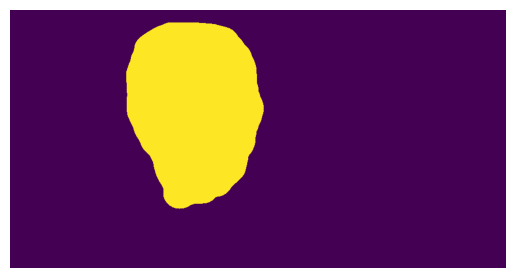

In [343]:
shape = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(64,64))

NewMask = cv2.morphologyEx(NewMask,cv2.MORPH_OPEN,shape)

plt.imshow(NewMask)
plt.axis('off')

(np.float64(-0.5), np.float64(959.5), np.float64(499.5), np.float64(-0.5))

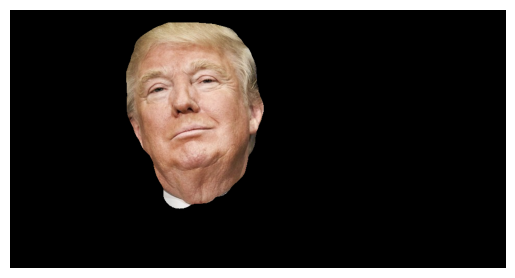

In [344]:
I = cv2.cvtColor(I, cv2.COLOR_HSV2RGB)
mask = cv2.cvtColor(NewMask, cv2.COLOR_GRAY2RGB)

face = cv2.bitwise_and(I, mask)

plt.imshow(face)
plt.axis('off')

359 265


(np.float64(-0.5), np.float64(264.5), np.float64(358.5), np.float64(-0.5))

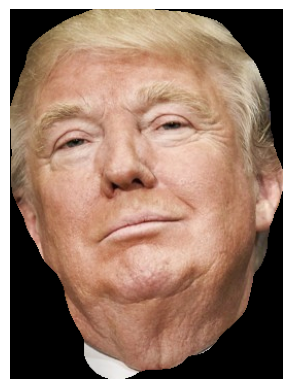

In [345]:
right = max(np.where(face > 100)[1])
left = min(np.where(face > 100)[1])
bottom = max(np.where(face > 100)[0])
top = min(np.where(face > 100)[0])

croppedImage = face[top:bottom, left:right]

h, w, c = croppedImage.shape
print(h, w)

plt.imshow(croppedImage)
plt.axis('off')